<a href="https://colab.research.google.com/github/hds1422/Stuff-I-Do-for-fun/blob/master/HW3_Videostats_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

import pandas as pd
import numpy as np

import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [0]:
# Import input (x) and output (y) data, and asign these to df1 and df1

x = pd.read_csv('StatsVideosXALL.csv')
y = pd.read_csv('StatsVideosYALL.csv')

In [0]:
df = pd.concat([x,y],axis=1,sort=False)

In [9]:
#find the share of the result object
df.shape

(3364, 4)

In [0]:
x=df[['Dislikes','Likes','Subscribers']]
y=df['Views']

In [11]:
df.head()

,Likes,Dislikes,Subscribers,Views
0,104460,3365,7300000,1988888
1,103203,3570,3300000,2617005
2,22485,612,1800000,932230
3,23077,1337,465000,1165800
4,12315,522,11000000,551165


In [0]:
# Split the data into input (x) training and testing data, and ouput (y) training and testing data, 
# with training data being 80% of the data, and testing data being the remaining 20% of the data

xtrain,xtest,ytrain,ytest = train_test_split(x, y, test_size=0.2, random_state = 10)

In [13]:
xtest.head()

,Dislikes,Likes,Subscribers
51,8307,33271,1300000
3214,428,19562,484000
3300,1577,70806,2000000
427,991,4133,364000
181,205,2522,10000


In [0]:
# Scale both training and testing input data
xtrain = preprocessing.scale(xtrain)
xtest = preprocessing.scale(xtest)

# Example with 500 epochs

In [15]:
# Defines "deep" model and its structure using Adam optimizer and mean_squared_error
model = Sequential()
model.add(Dense(13, input_shape=(3,), activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1,))
model.compile(optimizer='adam', loss='mean_squared_error')

# Runs model for 500 iterations and assigns this to 'history'
history = model.fit(xtrain, ytrain, epochs = 500, validation_split = 0.2, verbose = 0)

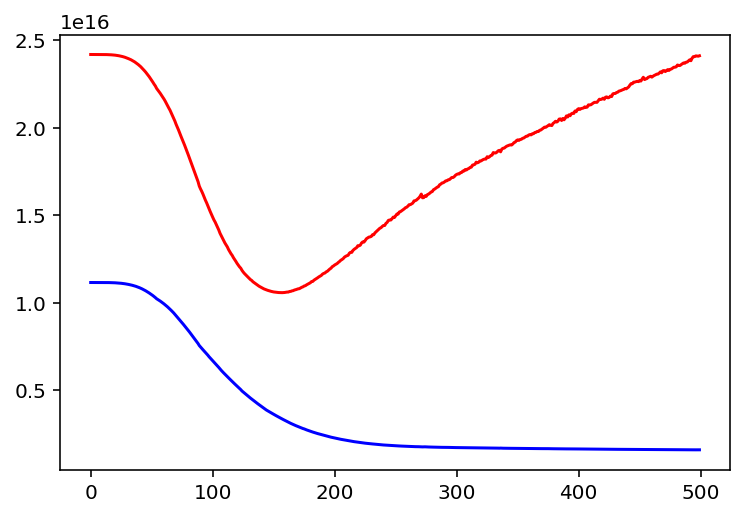

In [16]:
# Plots 'history'
history_dict=history.history
loss_values = history_dict['loss']
val_loss_values=history_dict['val_loss']
plt.plot(loss_values,'b',label='training loss')
plt.plot(val_loss_values,'r',label='training loss val')

# Example with early stopping function

In [17]:

# Pass several parameters to 'EarlyStopping' function and assigns it to 'earlystopper'
# Fits model over 2000 iterations with 'earlystopper' callback, and assigns it to history
history = model.fit(xtrain, ytrain, epochs = 2000, validation_split = 0.2,shuffle = True, verbose = 0, 
                    callbacks = [EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=1, mode='auto')])

Epoch 00008: early stopping


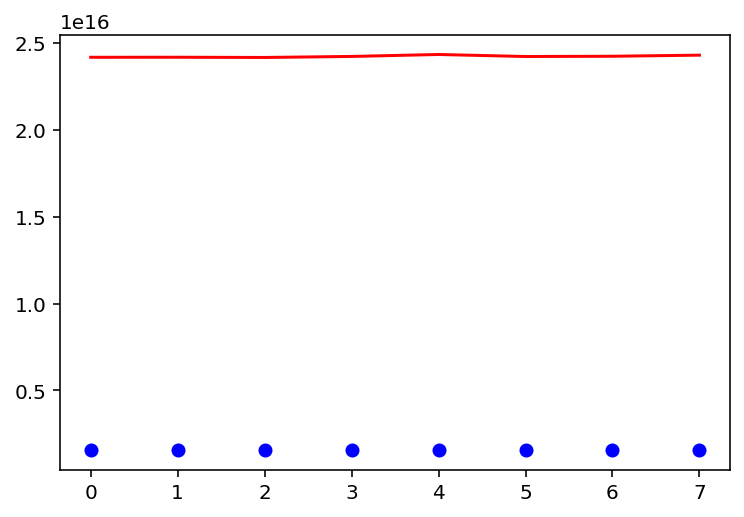

In [18]:
# Plots 'history'
history_dict=history.history
loss_values = history_dict['loss']
val_loss_values=history_dict['val_loss']
plt.plot(loss_values,'bo',label='training loss')
plt.plot(val_loss_values,'r',label='training loss val')

In [19]:
# Runs model with its current weights on the training and testing data
y_train_pred = model.predict(xtrain)
y_test_pred = model.predict(xtest)

# Calculates and prints r2 score of training and testing data
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(ytrain, y_train_pred)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(ytest, y_test_pred)))

The R2 score on the Train set is:	0.540
The R2 score on the Test set is:	0.714
